In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [179]:
data = pd.read_csv('heart_disease_data.csv')

In [180]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [181]:
data.dropna(inplace = True)

In [182]:
# Scaling features: ('trestbps', 'chol', 'thalack')
columns_to_scale = ['trestbps', 'chol', 'thalach']
scaler = MinMaxScaler() # creating the Min-Max scaler
scaled_features = pd.DataFrame(scaler.fit_transform(data[columns_to_scale]), columns=[col for col in columns_to_scale])
scaled_features.head()  # show the scaled features

,trestbps,chol,thalach
0,0.481132,0.244292,0.603053
1,0.339623,0.283105,0.885496
2,0.339623,0.178082,0.770992
3,0.245283,0.251142,0.816794
4,0.245283,0.520548,0.702290


In [183]:
# Dropping unscaled features
data.drop('trestbps', axis=1, inplace=True)
data.drop('chol', axis=1, inplace=True)
data.drop('thalach', axis=1, inplace=True)

In [184]:
# concatinating scaled features with the dataset
final_data = pd.concat([data, scaled_features], axis=1)
final_data.dropna(inplace = True) # dropping NaN values
final_data

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,trestbps,chol,thalach
0,63,1,3,1,0,0,2.3,0,0,1,1,0.481132,0.244292,0.603053
1,37,1,2,0,1,0,3.5,0,0,2,1,0.339623,0.283105,0.885496
2,41,0,1,0,0,0,1.4,2,0,2,1,0.339623,0.178082,0.770992
3,56,1,1,0,1,0,0.8,2,0,2,1,0.245283,0.251142,0.816794
4,57,0,0,0,1,1,0.6,2,0,2,1,0.245283,0.520548,0.702290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,1,1,0.2,1,0,3,0,0.433962,0.262557,0.396947
299,45,1,3,0,1,0,1.2,1,0,3,0,0.150943,0.315068,0.465649
300,68,1,0,1,1,0,3.4,1,2,3,0,0.471698,0.152968,0.534351
301,57,1,0,0,1,1,1.2,1,1,3,0,0.339623,0.011416,0.335878


In [185]:
X = final_data.drop(['target'], axis = 1) # droping the target 
y = final_data['target']

In [186]:
# splitting the data (training-testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # test data is 20 percent of the data

<Axes: >

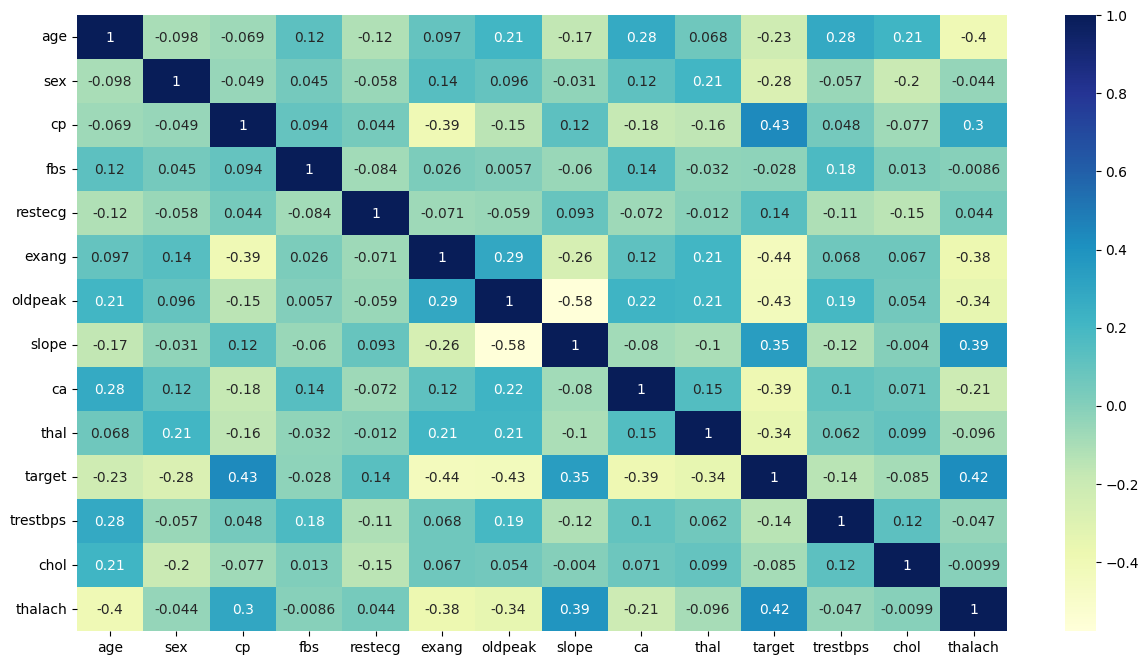

In [187]:
plt.figure(figsize = (15,8))
sns.heatmap(final_data.corr(), annot = True, cmap = 'YlGnBu')

In [188]:
logistic_regression = LogisticRegression(max_iter=2000)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [189]:
# accuracy of logistic regression
logistic_regression.score(X_test, y_test)

0.9016393442622951